In [1]:
import warnings
warnings.simplefilter(action='ignore',)

from qiskit import Aer, QuantumCircuit
from qiskit.utils import QuantumInstance
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import QuantumKernel
quantum_instance = QuantumInstance(Aer.get_backend('statevector_simulator'), shots=128)

import numpy as np
from pylab import cm
from sklearn.svm import SVC
from utils import train_test_split

In [2]:
DATA_FILEPATH = "dataset_graph7.csv"
train_x, train_y, test_x, test_y = train_test_split(DATA_FILEPATH)

R gate: 14
H gate: 3
CNOT gate: 3


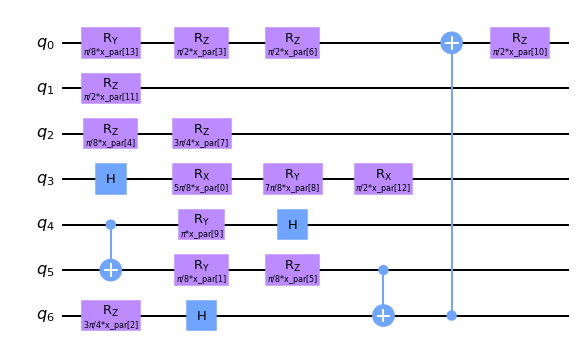

In [3]:
qc = QuantumCircuit(7)
x = ParameterVector('x_par', 14) 

print("R gate: 14\nH gate: 3\nCNOT gate: 3")

qc.ry((1/8)*np.pi*x[13],0)
qc.rz((1/2)*np.pi*x[3],0)
qc.rz((1/2)*np.pi*x[6],0)

qc.rz((1/2)*np.pi*x[11],1)

qc.rz((1/8)*np.pi*x[4],2)
qc.rz((3/4)*np.pi*x[7],2)

qc.h(3)
qc.rx((5/8)*np.pi*x[0],3)
qc.ry((7/8)*np.pi*x[8],3)
qc.rx((1/2)*np.pi*x[12],3)

qc.cnot(4,5)
qc.ry(np.pi*x[9],4)
qc.h(4)
qc.ry((1/8)*np.pi*x[1],5)
qc.rz((1/8)*np.pi*x[5],5)

qc.rz((3/4)*np.pi*x[2],6)
qc.h(6)

qc.cnot(5,6)
qc.cnot(6,0)
qc.rz((1/2)*np.pi*x[10],0)

qc.draw(output="mpl")

In [4]:
ga_kernel = QuantumKernel(feature_map=qc, quantum_instance=quantum_instance,)
model_ga = SVC(kernel=ga_kernel.evaluate)
qsvm = model_ga.fit(train_x, train_y)
q_score = model_ga.score(test_x, test_y)

print(f'Test kernel acc: {q_score}')

Test kernel acc: 1.0
